In [91]:
import pandas as pd 

df=pd.read_csv(r"C:\Users\leana\Desktop\amz_uk_price_prediction_dataset.csv")
print(df.columns)
df

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [92]:
"""1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status."""

crosstab = pd.crosstab(df['category'], df['isBestSeller'])
print (crosstab)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [93]:
# - Are there categories where being a best-seller is more prevalent? 
crosstab['Percentage_True'] = crosstab[True] / crosstab.sum(axis=1)
#ordered
crosstab_sorted = crosstab.sort_values(by='Percentage_True', ascending=False)
# don't like that it wasn't % displaying
crosstab_sorted['Percentage_True'] = crosstab_sorted['Percentage_True'].map('{:.2f}%'.format)
print(crosstab_sorted)



isBestSeller                      False  True Percentage_True
category                                                     
Grocery                            9008   556           0.06%
Smart Home Security & Lighting       98     6           0.06%
Health & Personal Care             9017   552           0.06%
Mobile Phone Accessories            248    11           0.04%
Power & Hand Tools                 8353   306           0.04%
...                                 ...   ...             ...
CD, Disc & Tape Players            8798     0           0.00%
General Music-Making Accessories    259     0           0.00%
Snowboard Boots                    1449     0           0.00%
Boxes & Organisers                  911     0           0.00%
eBook Readers & Accessories         246     0           0.00%

[296 rows x 3 columns]


In [94]:
""" **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
  """
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)
chi2_statistic, chi2_p_value
# reject null so their is correlation 


(36684.23786636857, 0.0)

In [95]:
 # - Compute Cramér's V to understand the strength of association between best-seller status and category."""
from scipy.stats.contingency import association

n = crosstab.sum().sum()
min_dim = min(crosstab.shape) - 1 # not sure to understand why 
cramer_v = (chi2_statistic / n) ** 0.5 / min_dim

print(cramer_v)

#seems  to be a low association 

0.061261835170048455


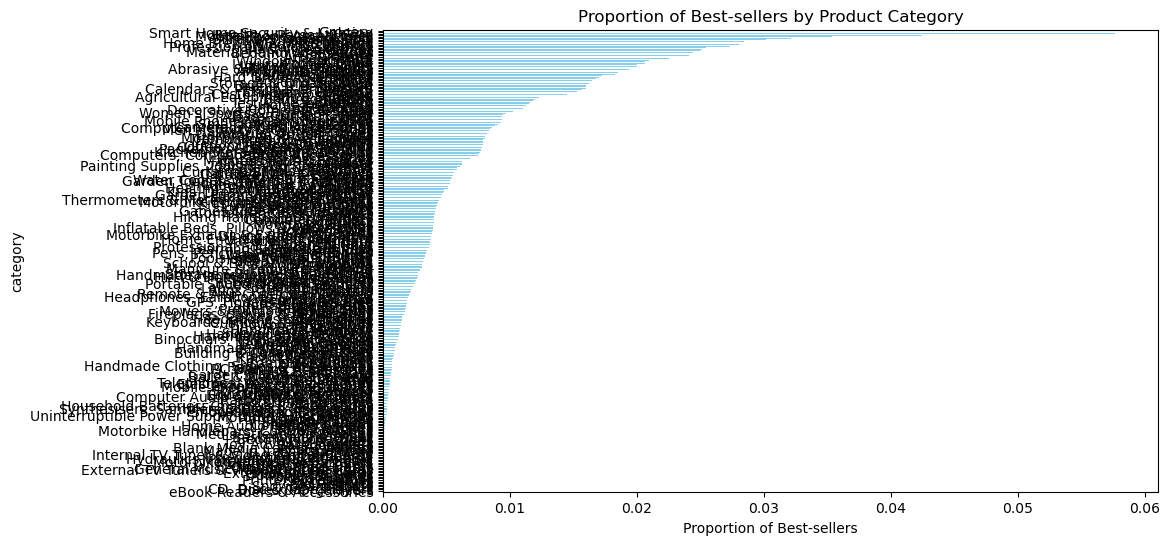

In [96]:
"""3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart."""
#import matplotlib.pyplot as plt
#crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
#plt.show()
#don't work to much categories 

# Calculate the proportion of best-sellers in each category
category_proportions = df.groupby('category')['isBestSeller'].mean().sort_values()

# Plot horizontal bar chart
category_proportions.plot(kind='barh', figsize=(10, 6), color='skyblue')

# Set plot labels and title
plt.title('Proportion of Best-sellers by Product Category')
plt.xlabel('Proportion of Best-sellers')


# Show plot
plt.show()





C:\Users\leana\AppData\Local\Temp\ipykernel_3804\2398378291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_categories['Percentage_True'] = top_10_categories['Percentage_True'].str.rstrip('%').astype(float)


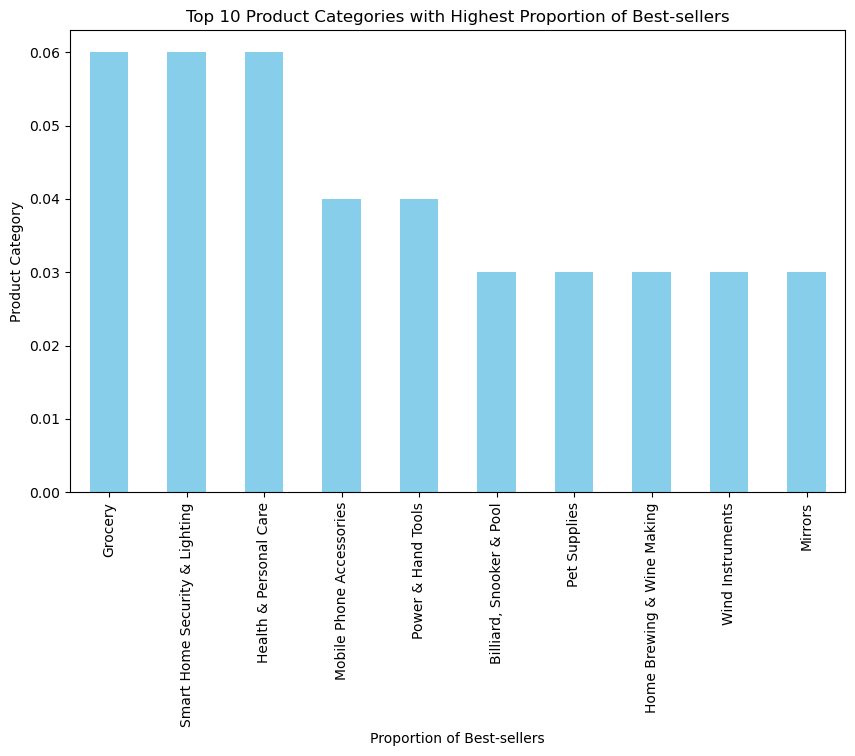

In [97]:
#better but don't like it much so i try to show the ten more correlated but i need to suprees %
top_10_categories = crosstab_sorted.head(10)
# Remove '%' symbol and convert to float
top_10_categories['Percentage_True'] = top_10_categories['Percentage_True'].str.rstrip('%').astype(float)

#sort 
top_10_categories_asc = top_10_categories.sort_values(by='Percentage_True')

top_10_categories['Percentage_True'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Product Categories with Highest Proportion of Best-sellers')
plt.xlabel('Proportion of Best-sellers')
plt.ylabel('Product Category')

# Show plot
plt.show()

In [98]:
"""### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*"""


'### Part 2: Exploring Product Prices and Ratings Across Categories and Brands\n\n**Objective**: Investigate how different product categories influence product prices.\n\n0. **Preliminary Step: Remove outliers in product prices.**\n\n\tFor this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.\n\t\n\t*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*'

In [99]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


Summary statistics before removing outliers:
count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

Summary statistics after removing outliers:
count    2.115963e+06
mean     2.340827e+01
std      2.051335e+01
min      0.000000e+00
25%      9.130000e+00
50%      1.599000e+01
75%      2.999000e+01
max      9.999000e+01
Name: price, dtype: float64


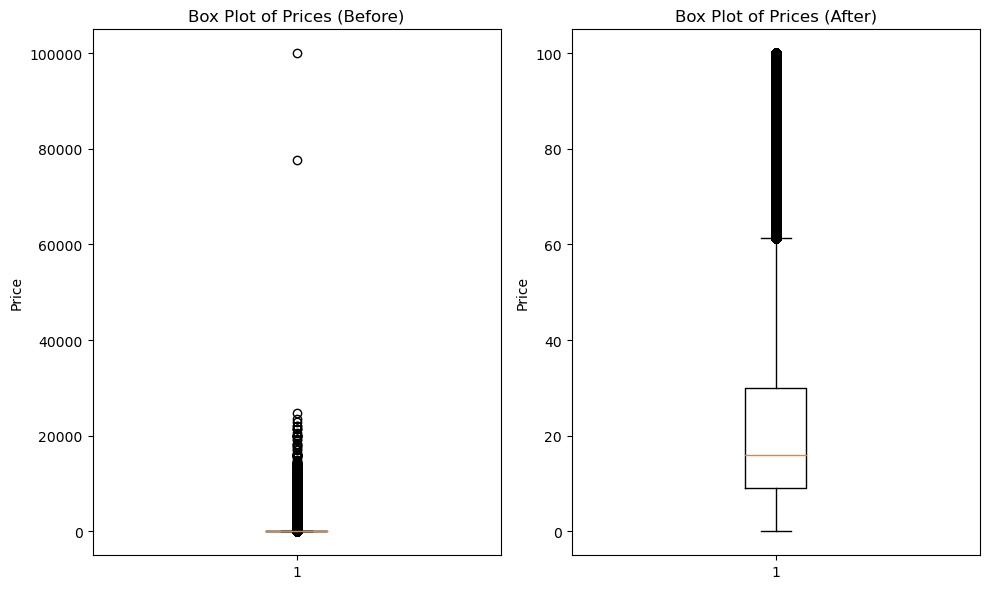

In [100]:
#checking 
import matplotlib.pyplot as plt

# Summary statistics before removing outliers
print("Summary statistics before removing outliers:")
print(df['price'].describe())

# Summary statistics after removing outliers
print("\nSummary statistics after removing outliers:")
print(df_no_outliers['price'].describe())

# Box plot before and after removing outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['price'])
plt.title('Box Plot of Prices (Before)')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers['price'])
plt.title('Box Plot of Prices (After)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


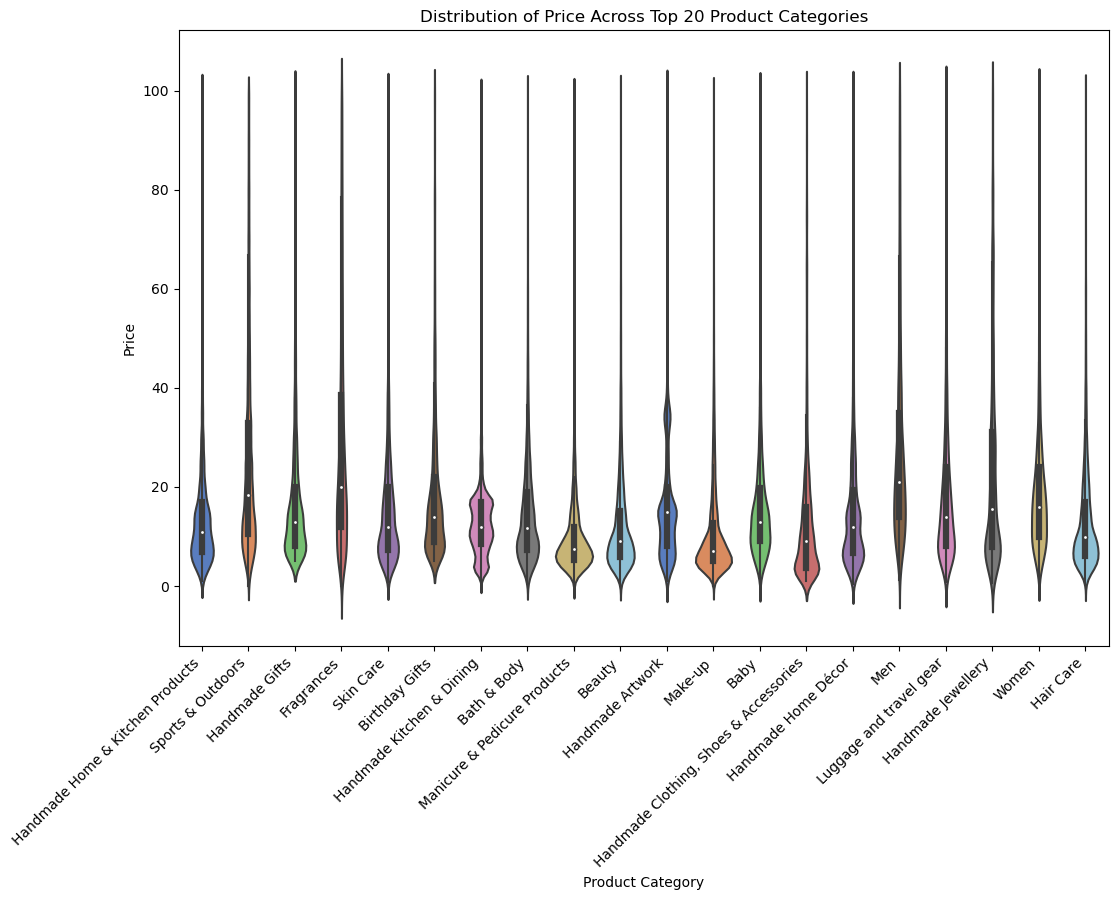

In [101]:
"""1. *Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
  """
import seaborn as sns
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
df_filtered = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_filtered, palette='muted')
plt.xticks(rotation=45, ha='right')

# Set plot title and labels
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')

# Show plot
plt.show()


In [102]:
median_prices = df_no_outliers.groupby('category')['price'].median()

category_highest_median_price = median_prices.idxmax()
highest_median_price = median_prices.max()
print(category_highest_median_price)
print( highest_median_price)


Desktop PCs
74.0


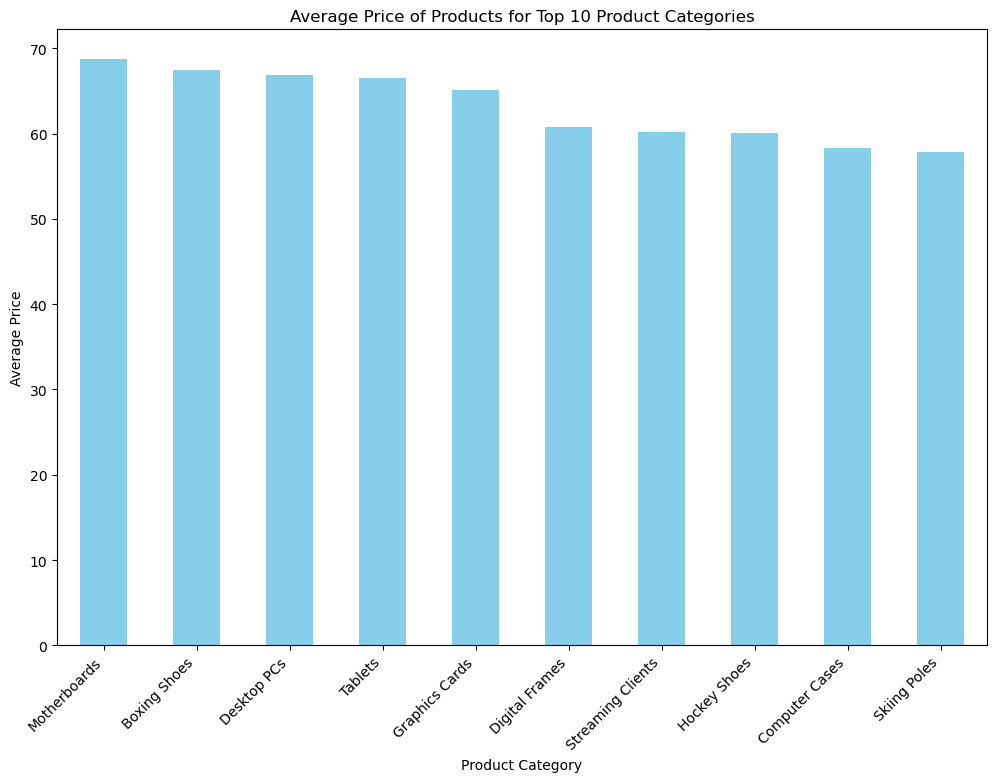

Product category with the highest average price: Motherboards
Highest average price: 68.77243243243242


In [103]:
 """**Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.
"""
import matplotlib.pyplot as plt

# Calculate the average price for each product category in the df_no_outliers DataFrame
average_prices = df_no_outliers.groupby('category')['price'].mean()

# Sort the categories based on their average prices and select the top 10
top_10_categories = average_prices.nlargest(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
top_10_categories.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

# Identify the product category with the highest average price
category_highest_average_price = top_10_categories.idxmax()
highest_average_price = top_10_categories.max()

print("Product category with the highest average price:", category_highest_average_price)
print("Highest average price:", highest_average_price)



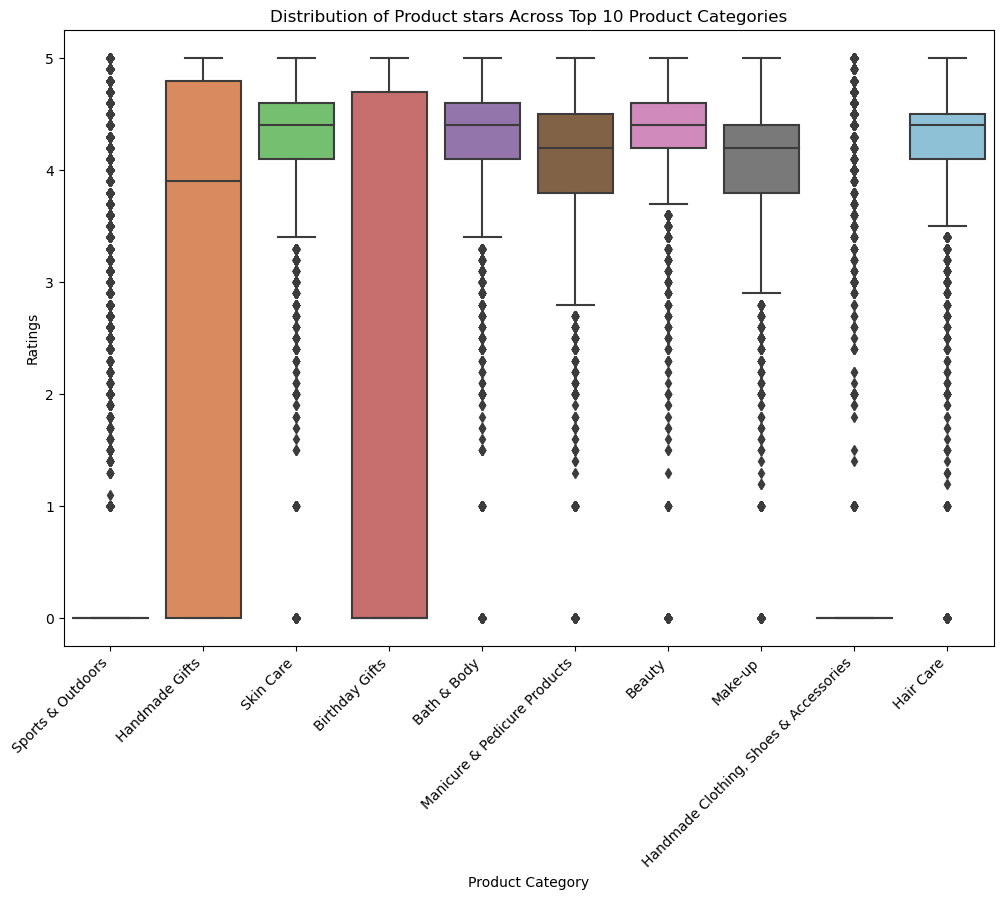

Category with the highest median rating: Computer Memory
Highest median rating: 4.7


In [104]:
"""
3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
"""

import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the top 10 categories based on count in the df_no_outliers DataFrame
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
df_filtered = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Create side-by-side box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_filtered, palette='muted')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot title and labels
plt.title('Distribution of Product stars Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Ratings')

# Show plot
plt.show()

# Identify the category with the highest median rating
median_ratings = df_no_outliers.groupby('category')['stars'].median()
category_highest_median_rating = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print("Category with the highest median rating:", category_highest_median_rating)
print("Highest median rating:", highest_median_rating)


'### Part 3: Investigating the Interplay Between Product Prices and Ratings\n\n**Objective**: Analyze how product ratings (`stars`) correlate with product prices.\n\n1. **Correlation Coefficients**:\n    - Calculate the correlation coefficient between `price` and `stars`.\n    - Is there a significant correlation between product price and its rating?\n\t\n2. **Visualizations**:\n    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?\n    - Use a correlation heatmap to visualize correlations between all numerical variables.\n    - Examine if product prices typically follow a normal distribution using a QQ plot. \n'

In [106]:

correlation_coefficient = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(correlation_coefficient)

# correletion significant ?
if correlation_coefficient > 0.5 or correlation_coefficient < -0.5:
    print("There is a significant correlation")
else:
    print("There is no significant correlation ")


-0.07767299878181323
There is no significant correlation 


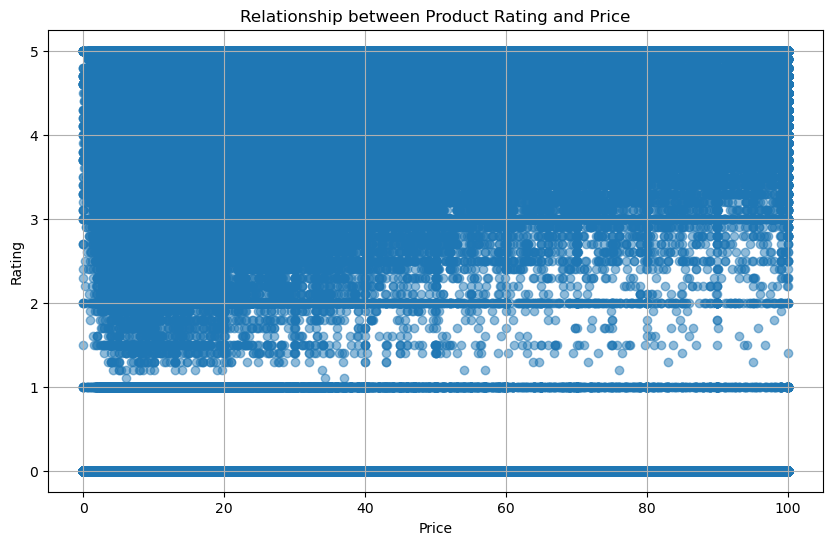

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['price'], df_no_outliers['stars'], alpha=0.5)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


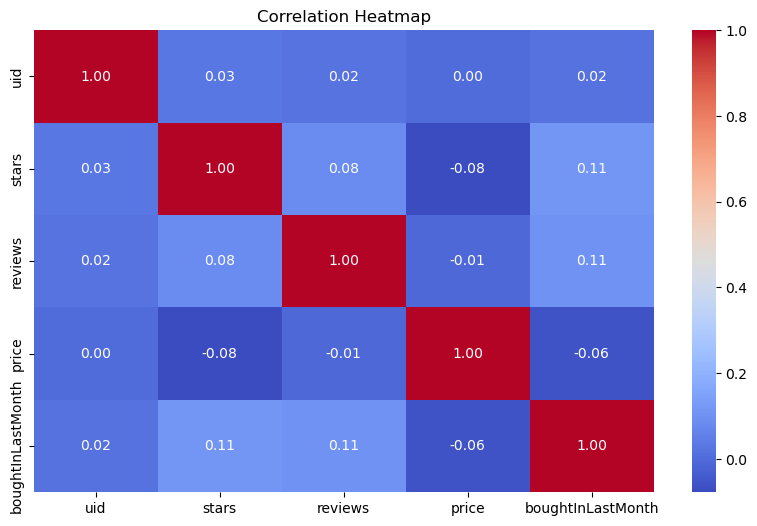

In [111]:
# only numerical columns
numerical_columns = df_no_outliers.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


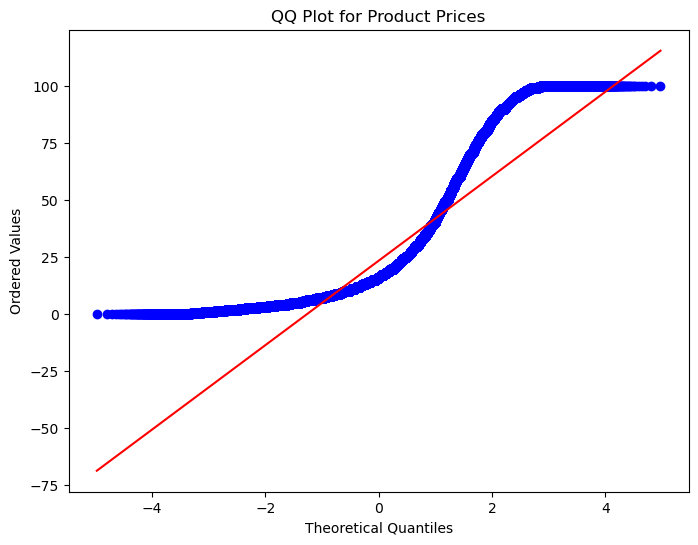

In [112]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.show()
